## Uber Data Analysis Project


##### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### See the Data

In [2]:
df = pd.read_csv("UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


##### **Data Overview**

1. **START_DATE**
   - **Description**: The date and time the trip started.
   - **Format**: `DD-MM-YYYY HH:MM`
   - **Example**: `01-01-2016 21:11` (January 1, 2016, at 9:11 PM)

2. **END_DATE**
   - **Description**: The date and time the trip ended.
   - **Format**: `DD-MM-YYYY HH:MM`
   - **Example**: `01-01-2016 21:17` (January 1, 2016, at 9:17 PM)

3. **CATEGORY**
   - **Description**: The classification of the trip (e.g., Business or Personal).
   - **Values**: 
     - `Business`
     - `Personal`
   - **Example**: `Business`

4. **START**
   - **Description**: The starting location of the trip.
   - **Example**: `Fort Pierce`

5. **STOP**
   - **Description**: The ending location of the trip.
   - **Example**: `West Palm Beach`

6. **MILES**
   - **Description**: The distance traveled during the trip, in miles.
   - **Example**: `5.1` (indicates a trip of 5.1 miles)

7. **PURPOSE**
   - **Description**: The reason for the trip.
   - **Example**: `Meal/Entertain`


In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


**Finding**

   - `As all the variable names in Upper Case convert them into Lower Case`

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Data Preprocessing

##### Check the Info of data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1156 non-null   object 
 1   end_date    1155 non-null   object 
 2   category    1155 non-null   object 
 3   start       1155 non-null   object 
 4   stop        1155 non-null   object 
 5   miles       1156 non-null   float64
 6   purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


**Finding**
 - `start_date and end_date columns has incorrect data type`
 - `purpose coloumn contain the null values` 

##### Correct the data type of columns `object` to `datetime`

In [7]:
from datetime import datetime
df["start_date"] = pd.to_datetime(df["start_date"], errors='coerce')
df["end_date"] = pd.to_datetime(df["end_date"],errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  421 non-null    datetime64[ns]
 1   end_date    420 non-null    datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1156 non-null   float64       
 6   purpose     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


##### Handling Null Values in Purpose Column
- Fill Nan with with other

In [9]:
df['purpose'].fillna('other', inplace=True)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_1160\4250077964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purpose'].fillna('other', inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  421 non-null    datetime64[ns]
 1   end_date    420 non-null    datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1156 non-null   float64       
 6   purpose     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


##### Separating Date and Time from Start Date

To categorize rides based on the time of day, we will:

1. **Separate the Date and Time**:
   - Extract the date and time components from the `START_DATE` column.
   - This helps in analyzing rides based on specific days and time slots.

2. **Classify Time into Categories**:
   - Use the time component to group rides into the following categories:
      - **Morning**: 00:00 to 09:59 (0 to 10)
      - **Late Morning**: 10:00 to 14:59 (10 to 15)
      - **Afternoon**: 15:00 to 18:59 (15 to 19)
      - **Night**: 19:00 to 23:59 (19 to 24)


In [11]:
# Step-1
df["date"] = pd.DatetimeIndex(df["start_date"]).date
df["time"] = pd.DatetimeIndex(df["start_date"]).hour


In [12]:
df.head(2)

,start_date,end_date,category,start,stop,miles,purpose,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other,2016-01-02,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  421 non-null    datetime64[ns]
 1   end_date    420 non-null    datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   miles       1156 non-null   float64       
 6   purpose     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 81.4+ KB


In [14]:
bins = [0, 10, 15, 19, 24]
labels = ['Morning', 'Afternoon', 'Evening', 'Night']

df["day_night"] = pd.cut(x=df["time"], bins=bins, labels=labels,right=False, include_lowest=True)
df.head()

,start_date,end_date,category,start,stop,miles,purpose,date,time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


##### Drop NaN value

In [15]:
df.isna().sum()

start_date    735
end_date      736
category        1
start           1
stop            1
miles           0
purpose         0
date          735
time          735
day_night     735
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

start_date    0
end_date      0
category      0
start         0
stop          0
miles         0
purpose       0
date          0
time          0
day_night     0
dtype: int64

### Analysis
#### Uber Rides Analysis Questions

##### Key Questions

1. **In which category do people book the most Uber rides?**
2. **For which purpose do people book Uber rides the most?**
3. **At what time do people book cabs the most from Uber?**
4. **In which months do people book Uber rides less frequently?**
5. **On which days of the week do people book Uber rides the most?**
6. **How many miles do people usually book a cab for through Uber?**


In [18]:
# Which category people book the ride mose
df['category'].value_counts()

category
Business    407
Personal     13
Name: count, dtype: int64

In [19]:
# Which purpose people book the ride mose
df['purpose'].value_counts()

purpose
other              159
Meeting             81
Meal/Entertain      64
Errand/Supplies     47
Customer Visit      46
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='purpose'>

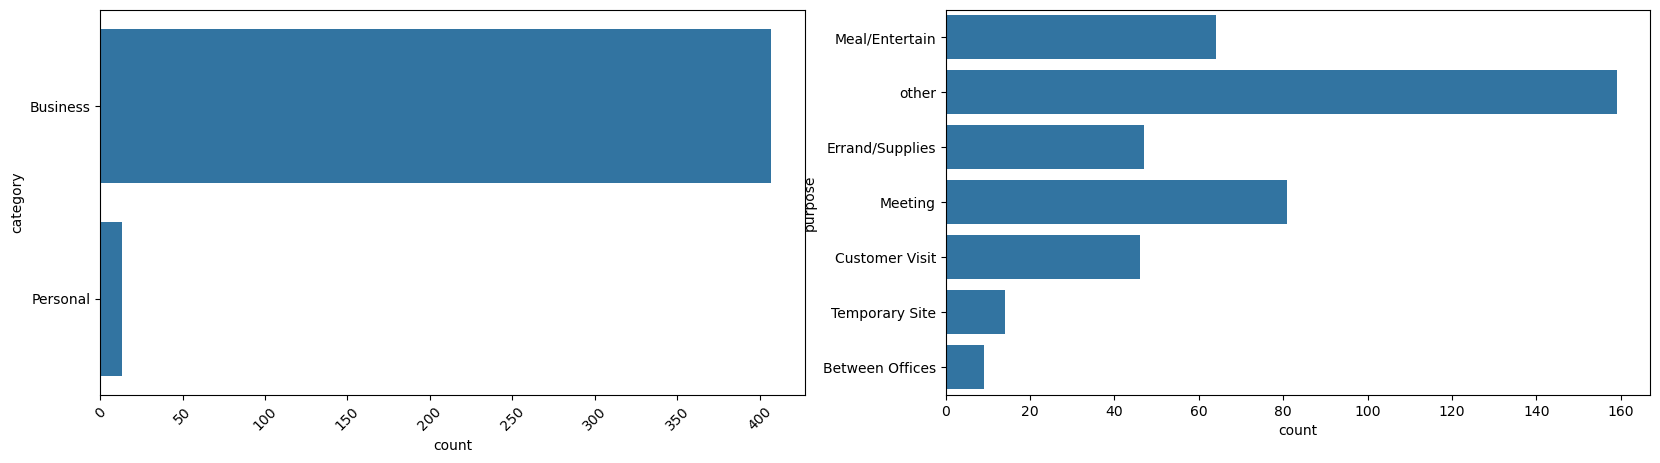

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(df['category'])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(df['purpose'])

##### `Conclusion`
- People mostly book Uber rides for `Business`.
- The primary purpose of riding Uber is for meetings, as the graph shows 'other' as an undefined category. Therefore, the second option, `"Meeting"` will be considered.


In [21]:
# Which time people book the uber ride
df['day_night'].value_counts()

day_night
Evening      137
Afternoon    134
Night         99
Morning       50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='day_night'>

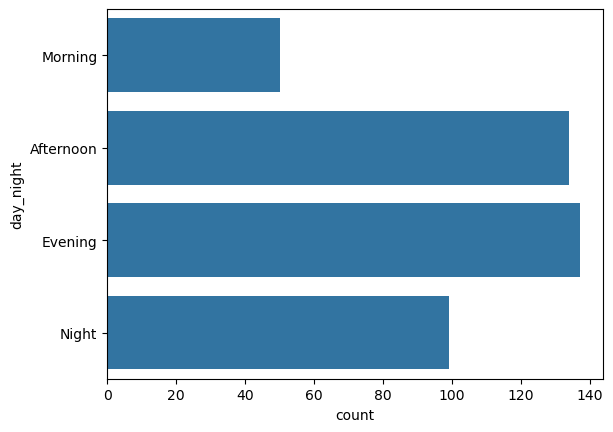

In [22]:
sns.countplot(df["day_night"])

##### `Conclusion`

- **Evening** is the most popular time for people to book Uber rides, with the highest count of bookings.
- **Afternoon** follows as the second most preferred time.
- **Night** is the third most popular time for Uber bookings.
- **Morning** has the lowest count of bookings, making it the least preferred time for people to book cabs.


In [23]:
df['month'] = pd.DatetimeIndex(df['start_date']).month

# Month labels mapping
month_labels = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Map numeric month to month names
df['month'] = df['month'].map(month_labels)

# Count the frequency of bookings in each month (value counts)
month_counts = df['month'].value_counts().sort_values(ascending=True)

# Aggregating max miles per month
max_miles_per_month = df.groupby('month')['miles'].max()

# Combine the month counts and max miles into a single DataFrame
df1 = pd.DataFrame({
    "month": month_counts.index,
    "values_counts": month_counts.values,
    "max_miles": max_miles_per_month.values
})

df1

,month,values_counts,max_miles
0,Sep,13,174.2
1,Jan,23,31.9
2,Oct,24,18.9
3,Apr,25,23.3
4,May,26,63.7
5,Dec,39,13.6
6,Feb,40,22.3
7,Jul,40,17.3
8,Mar,42,25.6
9,Jun,42,45.9


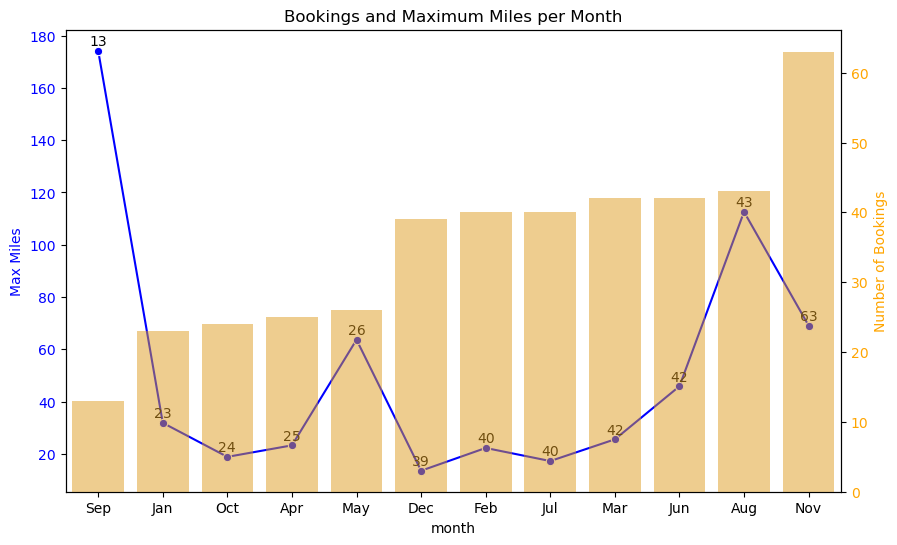

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the line graph for maximum miles
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting max miles on the first y-axis (line plot)
sns.lineplot(x='month', y='max_miles', data=df1, ax=ax1, color='blue', marker='o')
ax1.set_ylabel('Max Miles', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate each point with value counts (number of bookings)
for i, row in df1.iterrows():
    ax1.text(i, row['max_miles'] + 2,  # Adjust the offset value to place text above the line
             f"{row['values_counts']}", ha='center', fontsize=10, color='black')

# Creating a second y-axis to plot value counts (bar plot)
ax2 = ax1.twinx()
sns.barplot(x='month', y='values_counts', data=df1, ax=ax2, color='orange', alpha=0.5)
ax2.set_ylabel('Number of Bookings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and labels
plt.title('Bookings and Maximum Miles per Month')
plt.xticks(rotation=45)

plt.show()


##### `Conclusion`

- **Month with the Least Bookings**:  
  - **September (Sep)** had the fewest bookings, with a total of **13 bookings**. However, the **maximum miles** for these bookings was relatively high at **174.2 miles**, suggesting that although there were few bookings, they were for longer rides.

- **Month with the Most Bookings**:  
  - **November (Nov)** saw the highest number of bookings, with a total of **63 bookings**. The **maximum miles** in November was **69.0 miles**, indicating a relatively moderate distance compared to some other months with high bookings.

- **Observations on Maximum Miles**:
  - There is no strong correlation between the number of bookings and the maximum miles for each month. For instance, **June (42 bookings)** had **45.9 miles**, whereas **February (40 bookings)** had a much lower **22.3 miles**.

- **Booking Trends**:
  - The months with **more bookings** (such as **November, February, and July**) generally show a balance between the **number of bookings** and **maximum miles**.
  - The months with **fewer bookings** (such as **September**) may indicate longer rides despite the low volume.

In [34]:
# On which days of the week do people book Uber rides the most?

df['day'] = pd.DatetimeIndex(df['start_date']).weekday
day_labels = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
df['day'] = df['day'].map(day_labels)

In [28]:
df.head(2)

,start_date,end_date,category,start,stop,miles,purpose,date,time,day_night,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other,2016-01-02,1.0,Morning,Jan,Sat


In [30]:
dd = df['day'].value_counts()
dd

day
Fri    87
Mon    62
Thu    61
Tue    60
Sat    52
Wed    50
Sun    48
Name: count, dtype: int64

Text(0, 0.5, 'Count')

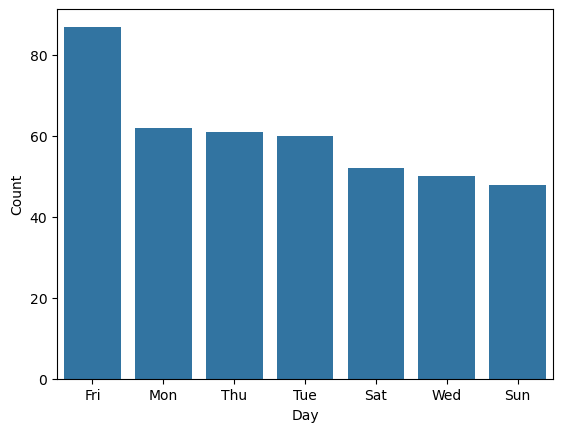

In [32]:
sns.barplot(x=dd.index, y=dd)
plt.xlabel("Day")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

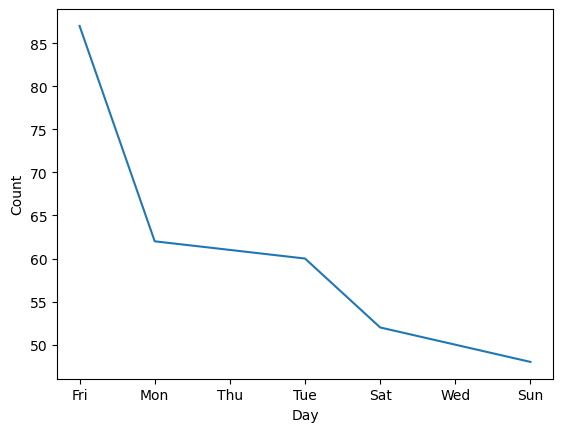

In [33]:
sns.lineplot(x=dd.index, y=dd)
plt.xlabel("Day")
plt.ylabel("Count")

#### `Conclusion`: Days of the Week with Most Uber Bookings

- **Friday** is the most popular day for booking Uber rides, as it has the highest count compared to other days of the week.
- The other weekdays (**Monday**, **Thursday**, and **Tuesday**) have relatively similar counts, indicating consistent usage during the week.
- **Saturday**, **Wednesday**, and **Sunday** have slightly lower counts, suggesting that weekends and mid-week days are less popular for Uber bookings compared to Fridays.


Text(0, 0.5, 'Frequency')

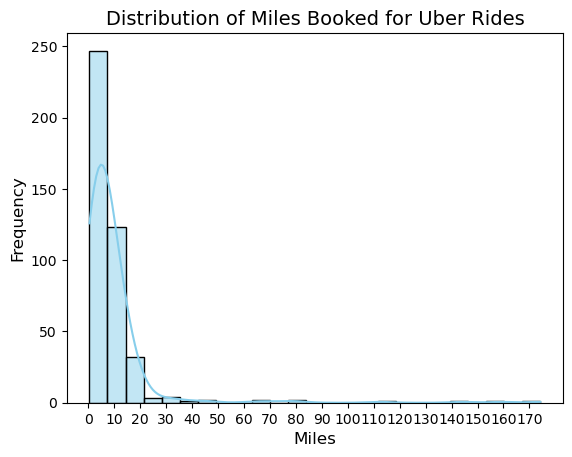

In [42]:
# How many miles do people usually book a cab for through Uber?
sns.histplot(df['miles'], bins=25, kde=True, color='skyblue')

# Add labels and title
ticks = list(range(0, 176, 10))
plt.xticks(ticks=ticks, fontsize=10)
plt.title("Distribution of Miles Booked for Uber Rides", fontsize=14)
plt.xlabel("Miles", fontsize=12)
plt.ylabel("Frequency", fontsize=12)


##### `Conclusion`
- **0 to 10 miles**: This is the most common range for short-distance trips, such as local commutes, errands, or trips within a city.
- **10 to 20 miles**: This range is often selected for medium-distance travel, such as trips to nearby suburbs, airports, or regional destinations.

